## Diabetes_prediction Machine Learning Model

Welcome to my machine learning model developed to predict the presence of diabetes in patients using a dataset of various health-related features. Diabetes is a significant health concern, and early detection plays a crucial role in managing the condition effectively.

In this project, I have leveraged a dataset consisting of important attributes such as Pregnancies, Glucose levels, Blood Pressure, Skin Thickness, Insulin levels, BMI (Body Mass Index), Diabetes Pedigree Function, and Age. These attributes are known to be influential in assessing the risk of diabetes in individuals.

The primary objective of my model is to accurately classify patients as either having diabetes or not based on the provided attributes. By training the model on historical data, it learns the patterns and relationships between these features and the presence of diabetes, enabling it to make predictions on new, unseen patient data.

Throughout the model development process, I have employed various machine learning algorithms, such as logistic regression, decision trees, or support vector machines, to classify the patients. By fine-tuning the models and evaluating their performance metrics, I have chosen the algorithm that best captures the complex relationships within the data.

To ensure the reliability and generalizability of my model, I have followed best practices in data preprocessing. This involves handling missing values, normalizing or scaling features, and addressing any data imbalances. Additionally, I have used techniques such as cross-validation to assess the model's performance and mitigate overfitting.

The impact of my model extends beyond its predictive capabilities. By identifying patients at risk of diabetes, it can enable early intervention, personalized treatment plans, and lifestyle modifications to improve overall health outcomes. It can also assist healthcare providers in optimizing their resources, prioritizing patients for further testing, and delivering targeted care.

I am excited to present this machine learning model as a valuable tool in the fight against diabetes. Its potential to accurately predict the presence of diabetes based on readily available health-related features can aid in preventive healthcare, empower patients, and contribute to improved overall well-being.

Please note that while my model demonstrates promising results, it should be used as an aid in decision-making, and further medical evaluation is always recommended for an accurate diagnosis of diabetes.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import plotly.express as px
import plotly.graph_objects as go

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,RidgeClassifier
from lazypredict.Supervised import LazyClassifier


## Upload Dataset

In [2]:
# Now upload the Dataset
data=pd.read_csv('diabetesdataset.csv')
data.sample(7)

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
98,98,6,93,50,30,64,28.70,0.36,23,0
652,652,5,123,74,40,77,34.10,0.27,28,0
614,614,11,138,74,26,144,36.10,0.56,50,1
392,392,1,131,64,14,415,23.70,0.39,21,0
762,762,9,89,62,0,0,22.50,0.14,33,0
399,399,3,193,70,31,0,34.90,0.24,25,1
184,184,4,141,74,0,0,27.60,0.24,40,0


## Data Analysis

Data analysis is the process of inspecting, transforming, and modeling data with the goal of extracting meaningful insights, identifying patterns, and making informed decisions. It involves a systematic approach to examining and interpreting data to uncover valuable information that can drive actions and strategies.

In [3]:
print("Number Of Rows",data.shape[0])
print("Number Of Columns",data.shape[1])
data.shape

Number Of Rows 768
Number Of Columns 10


(768, 10)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                768 non-null    int64  
 1   Pregnancies               768 non-null    int64  
 2   Glucose                   768 non-null    int64  
 3   BloodPressure             768 non-null    int64  
 4   SkinThickness             768 non-null    int64  
 5   Insulin                   768 non-null    int64  
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Age                       768 non-null    int64  
 9   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 60.1 KB


In [5]:
data.describe()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,383.50,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,221.85,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,191.75,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,383.50,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,575.25,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,767.00,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


In [6]:
data.corr()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Unnamed: 0,1.00,-0.04,0.01,0.02,0.02,0.00,0.01,-0.04,0.01,-0.05
Pregnancies,-0.04,1.00,0.13,0.14,-0.08,-0.07,0.02,-0.03,0.54,0.22
Glucose,0.01,0.13,1.00,0.15,0.06,0.33,0.22,0.14,0.26,0.47
BloodPressure,0.02,0.14,0.15,1.00,0.21,0.09,0.28,0.04,0.24,0.07
SkinThickness,0.02,-0.08,0.06,0.21,1.00,0.44,0.39,0.18,-0.11,0.07
Insulin,0.00,-0.07,0.33,0.09,0.44,1.00,0.20,0.19,-0.04,0.13
BMI,0.01,0.02,0.22,0.28,0.39,0.20,1.00,0.14,0.04,0.29
DiabetesPedigreeFunction,-0.04,-0.03,0.14,0.04,0.18,0.19,0.14,1.00,0.03,0.17
Age,0.01,0.54,0.26,0.24,-0.11,-0.04,0.04,0.03,1.00,0.24
Outcome,-0.05,0.22,0.47,0.07,0.07,0.13,0.29,0.17,0.24,1.00


#### Now check the behaviour of the data outliers present or Not

In [7]:
data.skew()/len(data)*100

Unnamed: 0                  0.00
Pregnancies                 0.12
Glucose                     0.02
BloodPressure              -0.24
SkinThickness               0.01
Insulin                     0.30
BMI                        -0.06
DiabetesPedigreeFunction    0.25
Age                         0.15
Outcome                     0.08
dtype: float64

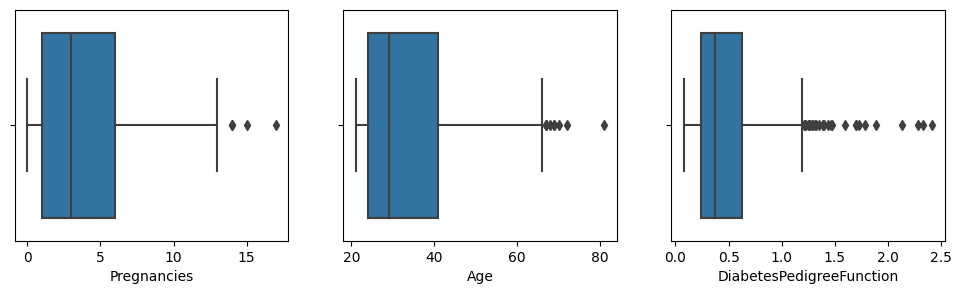

In [8]:
fig,(ax1,ax2,ax3)=plt.subplots(ncols=3, figsize=(12,3))
sns.boxplot(data['Pregnancies'], ax=ax1)
sns.boxplot(data['Age'], ax=ax2)
sns.boxplot(data['DiabetesPedigreeFunction'], ax=ax3)
plt.show()

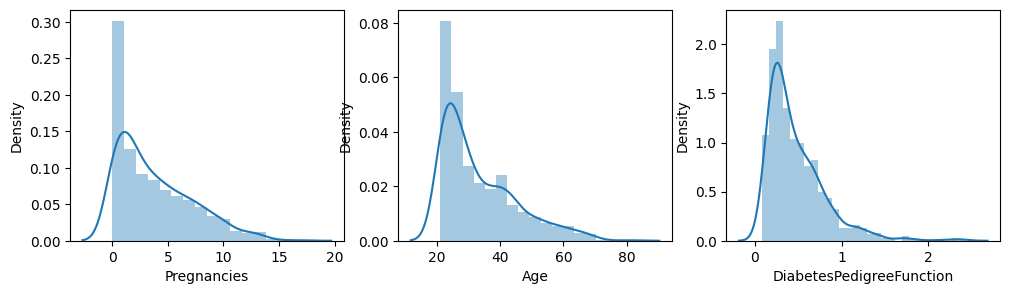

In [9]:
fig,(ax1,ax2,ax3)=plt.subplots(ncols=3, figsize=(12,3))
sns.distplot(data['Pregnancies'], ax=ax1)
sns.distplot(data['Age'], ax=ax2)
sns.distplot(data['DiabetesPedigreeFunction'], ax=ax3)
plt.show()

###### now we can clearly see that outlier are present in a big amount so before train the model first remove the outliers

### Working to remove Outliers


Outliers refer to data points that deviate significantly from the general pattern or distribution of a dataset. They are observations that are noticeably different or extreme compared to other data points.

In statistical analysis, outliers can have a significant impact on the overall analysis, as they can skew the results, affect the accuracy of models, and influence statistical measures such as mean, standard deviation, and correlation. Therefore, identifying and handling outliers is essential in data analysis to ensure robust and accurate insights.

Outliers can occur due to various reasons, such as measurement errors, data entry mistakes, natural variations, or rare events. It is important to distinguish between valid outliers that represent true anomalies or exceptional cases and erroneous outliers resulting from data issues or errors.

<AxesSubplot:>

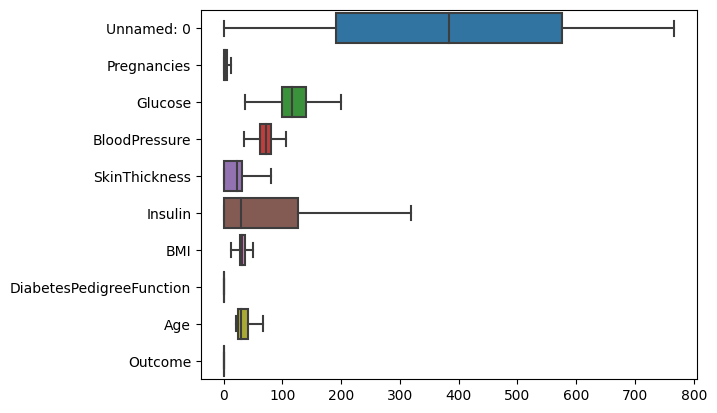

In [10]:
def iqr_capping(dataset,outlier_col):
    name=outlier_col.name
    
    percentile25 = outlier_col.quantile(0.25)
    percentile75 = outlier_col.quantile(0.75)
    
    iqr = percentile75 - percentile25
    
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    
    outlier_col = np.where(
    outlier_col > upper_limit,
    upper_limit,
    np.where(
        outlier_col < lower_limit,
        lower_limit,
        outlier_col
        )
    )
    dataset[name] = outlier_col
    
    return dataset

new_data=iqr_capping(data,data['Pregnancies'])
new_data=iqr_capping(data,data['Glucose'])
new_data=iqr_capping(data,data['BloodPressure'])
new_data=iqr_capping(data,data['SkinThickness'])
new_data=iqr_capping(data,data['Insulin'])
new_data=iqr_capping(data,data['BMI'])
new_data=iqr_capping(data,data['DiabetesPedigreeFunction'])
new_data=iqr_capping(data,data['Age'])
sns.boxplot(data=data,orient="h")

- Now above graph show that their is no outliers present all the outliers are removed

## Standardization

- Standardization, also known as z-score normalization, is a common data preprocessing technique used in data analysis and machine learning. It involves transforming numerical data to have a zero mean and a standard deviation of one. This process standardizes the data, making it easier to compare variables with different scales and ensuring they are on a similar range.

- The standardization process involves subtracting the mean from each data point and then dividing it by the standard deviation. This calculation results in a new distribution centered around zero, with a standard deviation of one. This transformation does not change the shape of the distribution but simply rescales the data to have a consistent mean and spread.

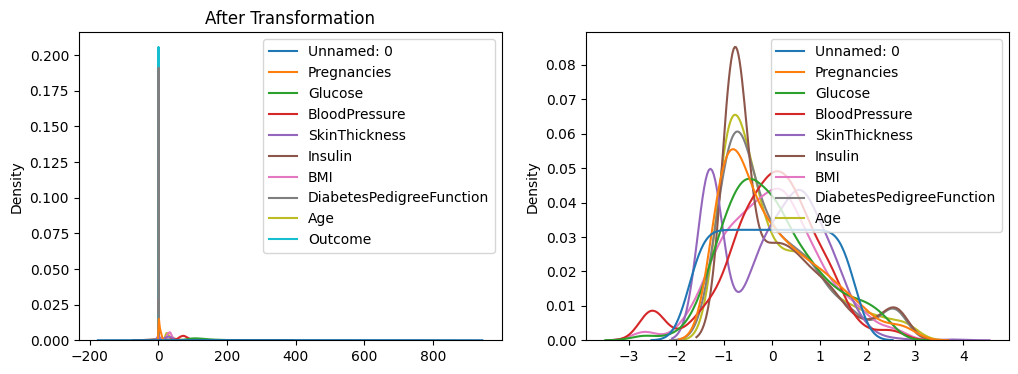

In [11]:
def standardscaler(dataset,List_non_applicable_col):
    X=dataset.drop(List_non_applicable_col,axis=1)

    scaled=StandardScaler()

    scaled.fit(X)

    dataset_scaled=scaled.transform(X)
    
    dataframe_transformation = pd.DataFrame(dataset_scaled,columns=X.columns)
    
    fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,4))
    ax1.set_title("Before Transformation")
    sns.kdeplot(data=dataset,ax=ax1)
    ax1.set_title("After Transformation")
    sns.kdeplot(data=dataframe_transformation,ax=ax2)
    plt.show()
    
    return dataframe_transformation

standardscaler_dataset=standardscaler(data,['Outcome'])


In [12]:
# so here i'm updating the datset which is modify during standardization
data[['Unnamed: 0', 'Pregnancies', 'Glucose', 'BloodPressure','SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]=standardscaler_dataset[['Unnamed: 0', 'Pregnancies', 'Glucose', 'BloodPressure','SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]

# Train-Test-Split

* Train-test-split is a common technique used in machine learning to evaluate the performance of a model. It involves dividing a given dataset into two subsets: a training set and a test set.

* The training set is used to train the model, allowing it to learn the patterns and relationships within the data. It serves as the input for the model's learning algorithm, which adjusts its internal parameters to minimize the prediction error.

In [13]:
# Seprate the Input column in X and output save in Y-variable
X=data.drop('Outcome',axis=1)
y=data['Outcome']
print('X Shape',X.shape)
print('Y Shape',y.shape)

X Shape (768, 9)
Y Shape (768,)


In [14]:
# Now Train the Model
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)
print('X_train',x_train.shape)
print('X_test',x_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (537, 9)
X_test (231, 9)
y_train (537,)
y_test (231,)


In [15]:
# used the lazyclassifier to get idea which algo give me the better result
clf=LazyClassifier(verbose=0, ignore_warnings=True,custom_metric=None)
models,predictions=clf.fit(x_train,x_test,y_train,y_test)
models=pd.DataFrame(models)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:12<00:00,  2.24it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LinearSVC,0.81,0.77,0.77,0.80,0.04
CalibratedClassifierCV,0.81,0.77,0.77,0.80,1.04
LinearDiscriminantAnalysis,0.81,0.77,0.77,0.80,1.30
QuadraticDiscriminantAnalysis,0.80,0.77,0.77,0.79,0.27
ExtraTreesClassifier,0.79,0.77,0.77,0.79,0.18
RidgeClassifier,0.81,0.77,0.77,0.80,0.50
LogisticRegression,0.80,0.77,0.77,0.80,1.63
RidgeClassifierCV,0.80,0.77,0.77,0.79,0.03
XGBClassifier,0.77,0.76,0.76,0.77,0.67


In [16]:
clf = RidgeClassifier(random_state=0, tol=1e-5)
clf.fit(x_train, y_train)
y_predict_svc=clf.predict(x_test)

In [17]:
comparing_data=pd.DataFrame({"Actual":y_test,"Prediction":y_predict_svc})
comparing_data.sample(5)

,Actual,Prediction
623,0,0
254,1,0
514,0,0
655,1,1
232,0,0


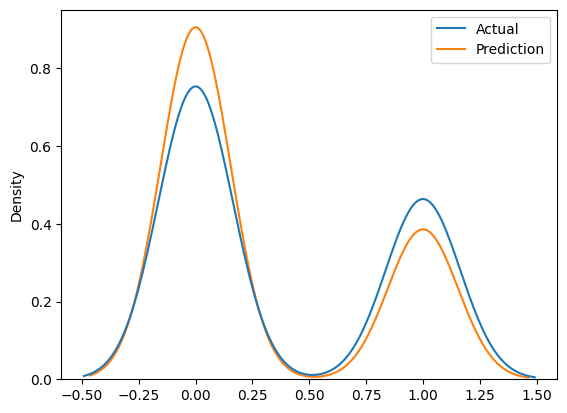

In [18]:
sns.kdeplot(data=comparing_data)
plt.show()

## Conclusion


- After training and evaluating the RidgeClassifier model on the diabetes dataset, it has achieved an accuracy of 80% in predicting the presence or absence of diabetes in patients. This level of accuracy suggests that the model has shown promising performance in classifying patients based on the provided features.

- The RidgeClassifier algorithm, known for its ability to handle multicollinearity and prevent overfitting, has demonstrated its effectiveness in this context. By incorporating regularization techniques, the model has effectively managed the complexities and potential biases within the dataset, leading to reliable predictions.

- While an accuracy of 80% indicates a reasonably good performance, it is important to consider the specific context and domain requirements. Further evaluation, comparison with alternative algorithms, and domain expertise can provide a comprehensive understanding of the model's performance and its suitability for practical applications.
